In [1]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split 
from collections import Counter
import matplotlib.pyplot as plt
import utils

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
print('train_num: ', len(train))
print('train_user_num', len(train['uid'].drop_duplicates()))

train_num:  8798814


train_user_num 7883466


In [4]:
utils.cal_pos_rate(train)

pos: 0.047956576875019745
neg: 0.9520434231249802


In [5]:
train_ads = train['aid'].drop_duplicates()
test_ads = test['aid'].drop_duplicates()

In [6]:
train_ads.describe()

count     173.000000
mean     1140.364162
std       658.957025
min         6.000000
25%       562.000000
50%      1171.000000
75%      1728.000000
max      2216.000000
Name: aid, dtype: float64

In [7]:
test_ads.describe()

count     173.000000
mean     1140.364162
std       658.957025
min         6.000000
25%       562.000000
50%      1171.000000
75%      1728.000000
max      2216.000000
Name: aid, dtype: float64

(array([1126301., 1015137.,  476445., 1076896.,  723164.,  997862.,
        1249499.,  822427.,  745254.,  565829.]),
 array([   6.,  227.,  448.,  669.,  890., 1111., 1332., 1553., 1774.,
        1995., 2216.]),
 <a list of 10 Patch objects>)

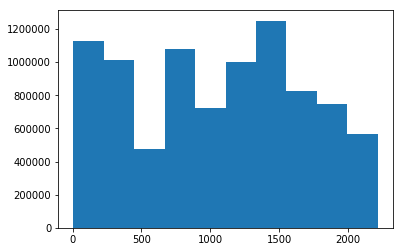

In [13]:
plt.hist(train['aid'])

(array([289533., 261203., 122914., 278013., 186539., 256256., 321670.,
        211954., 192446., 145461.]),
 array([   6.,  227.,  448.,  669.,  890., 1111., 1332., 1553., 1774.,
        1995., 2216.]),
 <a list of 10 Patch objects>)

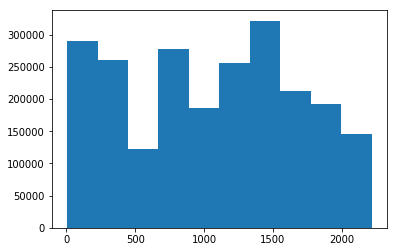

In [14]:
plt.hist(test['aid'])

In [8]:
pos_rates = utils.get_pos_rate_by_aid(train, train_ads)

(array([ 7., 20., 55., 53., 24.,  8.,  4.,  1.,  0.,  1.]),
 array([0.04443102, 0.0454965 , 0.04656199, 0.04762747, 0.04869295,
        0.04975843, 0.05082392, 0.0518894 , 0.05295488, 0.05402037,
        0.05508585]),
 <a list of 10 Patch objects>)

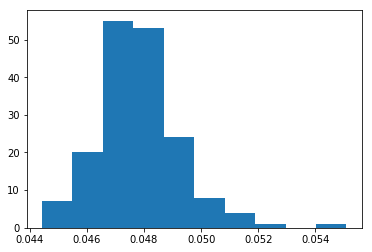

In [9]:
plt.hist(pos_rates)

In [10]:
pd.Series(pos_rates).describe()

count    173.000000
mean       0.047784
std        0.001441
min        0.044431
25%        0.046988
50%        0.047707
75%        0.048488
max        0.055086
dtype: float64

In [11]:
train_ad_user_all_shuffle = pd.read_csv('data/train_ad_user_all_shuffle.csv')
train_train, train_valid = train_test_split(train_ad_user_all_shuffle, test_size=0.2)

In [12]:
utils.cal_pos_rate(train_train)

pos: 0.04798246240864003
neg: 0.95201753759136


In [13]:
utils.cal_pos_rate(train_valid)

pos: 0.04785303475524829
neg: 0.9521469652447517


(array([ 901151.,  812245.,  381731.,  861004.,  578856.,  798991.,
        1000082.,  656827.,  595776.,  452388.]),
 array([   6.,  227.,  448.,  669.,  890., 1111., 1332., 1553., 1774.,
        1995., 2216.]),
 <a list of 10 Patch objects>)

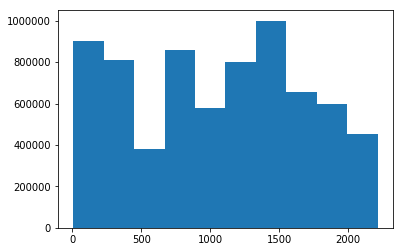

In [14]:
plt.hist(train_train['aid'])

(array([225150., 202892.,  94714., 215892., 144308., 198871., 249417.,
        165600., 149478., 113441.]),
 array([   6.,  227.,  448.,  669.,  890., 1111., 1332., 1553., 1774.,
        1995., 2216.]),
 <a list of 10 Patch objects>)

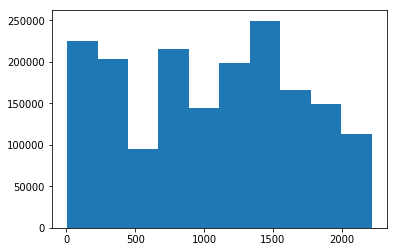

In [15]:
plt.hist(train_valid['aid'])

(array([1126301., 1015137.,  476445., 1076896.,  723164.,  997862.,
        1249499.,  822427.,  745254.,  565829.]),
 array([   6.,  227.,  448.,  669.,  890., 1111., 1332., 1553., 1774.,
        1995., 2216.]),
 <a list of 10 Patch objects>)

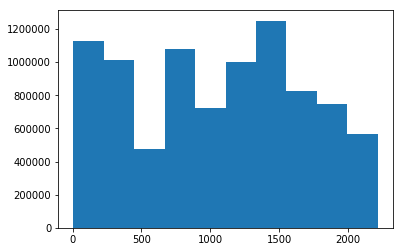

In [16]:
plt.hist(train['aid'])

In [17]:
train_pos_rates = utils.get_pos_rate_by_aid(train_train, train_ads)
val_pos_rates = utils.get_pos_rate_by_aid(train_valid, train_ads)

In [18]:
pd.Series(train_pos_rates).describe()

count    173.000000
mean       0.047771
std        0.001721
min        0.043401
25%        0.046822
50%        0.047804
75%        0.048587
max        0.055243
dtype: float64

In [22]:
pd.Series(val_pos_rates).describe()

count    173.000000
mean       0.047832
std        0.003961
min        0.035208
25%        0.045900
50%        0.047759
75%        0.049462
max        0.064556
dtype: float64

(array([ 7., 14., 30., 53., 43., 20.,  3.,  0.,  2.,  1.]),
 array([0.04340124, 0.04458539, 0.04576954, 0.0469537 , 0.04813785,
        0.049322  , 0.05050615, 0.0516903 , 0.05287445, 0.05405861,
        0.05524276]),
 <a list of 10 Patch objects>)

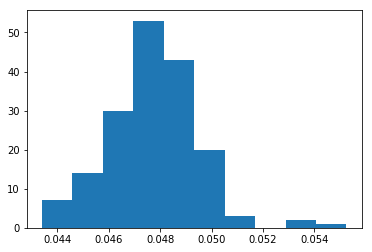

In [19]:
plt.hist(train_pos_rates)

(array([ 3.,  3., 15., 47., 67., 22.,  9.,  3.,  3.,  1.]),
 array([0.03520757, 0.03814245, 0.04107734, 0.04401223, 0.04694711,
        0.049882  , 0.05281689, 0.05575177, 0.05868666, 0.06162155,
        0.06455643]),
 <a list of 10 Patch objects>)

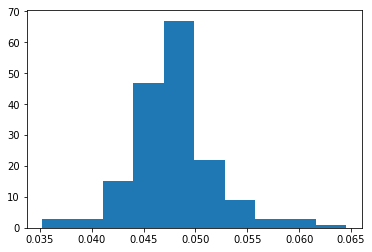

In [23]:
plt.hist(val_pos_rates)

In [24]:
train_train.head()

,aid,uid,label,advertiserId,campaignId,creativeId,creativeSize,adCategoryId,productId,productType,...,consumptionAbility,LBS,ct,os,carrier,house,interest,kw,topic,appId
7076584,1379,60412222,-1,0.294872,0.372263,0.412791,0.071429,0.000000,0.03125,0.666667,...,0.5,0.347041,0.333333,0.333333,0.000000,0.0,77-49-15-6-46-116-36-11-209-267-252-246-221-22...,652-2908-2-719-3444-109-14286-12371,8418-4484-6088-2552-5911-18510-12545-14835-117...,0
4798421,1375,77524103,-1,0.025641,0.328467,0.901163,0.000000,0.000000,0.03125,0.666667,...,0.0,0.739218,0.033333,0.166667,0.000000,0.0,36-11,480-77-11-3142-218-4642-1540-6377,5935-6661-6578-8778-3414-11256-16063-17808-162...,0
1094669,1415,28068503,-1,0.576923,0.744526,0.686047,0.071429,0.974359,0.00000,0.000000,...,0.5,0.419258,0.266667,0.333333,0.333333,0.0,93-70-77-86-37-109-98-4-75-69-29-49-83-6-42-46...,262-1296-1721-138-43-3069-60-3970-30,9826-9264-55-506-4851-14338-17315-18747-18083-...,0
1966964,1468,26510914,-1,0.038462,0.043796,0.319767,0.714286,0.128205,0.00000,0.000000,...,0.0,0.952859,0.333333,0.666667,0.333333,0.0,93-70-118-100-47-76-4-69-28-8-106-6-46-22-9-36...,10326-7558-8697-1352-267-4-972,9377-384-254-915-9477-11356-11891-10943-19705-...,0
1466758,1468,82185043,-1,0.038462,0.043796,0.319767,0.714286,0.128205,0.00000,0.000000,...,0.5,0.105316,0.333333,0.333333,0.333333,0.0,93-70-75-69-28-29-46-36-11-107-552-600-631-616...,39-8266-2811-2833-771-2814-208-638,1066-7684-2404-6939-421-10566-10473-11815-1456...,0


In [25]:
train_train.to_csv('data/train_train.csv', columns=train_train.columns, index=False)
train_valid.to_csv('data/train_valid.csv', columns=train_train.columns, index=False)

In [3]:
train_train = pd.read_csv('data/train_train.csv')
train_valid = pd.read_csv('data/train_valid.csv')
print(len(train_train))
print(len(train_valid))

7039051
1759763


In [5]:
train_valid[train_valid['aid'] == 1379].head()

,aid,uid,label,advertiserId,campaignId,creativeId,creativeSize,adCategoryId,productId,productType,...,consumptionAbility,LBS,ct,os,carrier,house,interest,kw,topic,appId
63,1379,11342939,-1,0.294872,0.372263,0.412791,0.071429,0.0,0.03125,0.666667,...,0.5,0.781344,0.333333,0.333333,0.333333,0.0,93-70-86-109-76-75-69-29-49-73-114-91-72-46-36...,3-669-374-8992-10-896-106-13-25,105-644-4973-9264-8525-16268-12483-19305-19114...,0
142,1379,50350600,-1,0.294872,0.372263,0.412791,0.071429,0.0,0.03125,0.666667,...,0.5,0.785356,0.333333,0.666667,0.333333,0.0,109-119-279-273-242-209-267-201-270-206-221-21...,9298-2517-99-1835-8604-0-9-821-19-167-3657-24-...,3291-7772-2718-2848-2967-15641-16311-11352-127...,0
186,1379,80172848,-1,0.294872,0.372263,0.412791,0.071429,0.0,0.03125,0.666667,...,0.5,0.475426,0.333333,0.333333,0.333333,0.0,70-76-201-270-210-235-552-531-631-616-578-508-...,310-163-34-1278-112,3632-636-1966-1768-9233-12981-14329-11654-1175...,0
203,1379,52660145,-1,0.294872,0.372263,0.412791,0.071429,0.0,0.03125,0.666667,...,0.5,0.550652,0.266667,0.333333,1.000000,0.0,49-6-89-17-56-116-36-11-537-506-542-589-546-55...,10767-996-3085-3522-7-205-160-15,9877-3135-9826-644-7653-14671-11699-15307-1238...,0
380,1379,20487183,-1,0.294872,0.372263,0.412791,0.071429,0.0,0.03125,0.666667,...,1.0,0.659980,0.333333,0.333333,0.333333,0.0,70-86-109-47-75-76-69-45-29-59-49-6-2-39-71-23...,29-2025-1004-1-5-186-211-15,3188-9826-7684-8822-1964-13368-13609-13624-156...,0


In [1]:
import numpy as np

In [4]:
x = np.ndarray([1,1,1,2,2,4,4])
set(x.tolist())

TypeError: unhashable type: 'list'

In [8]:
x = np.ndarray([1,1,1,2,2,4,4])
x

array([[[[[[[7.36190311e+228, 4.47590761e-091, 5.98149672e-154,
             6.45312007e+247],
            [2.41795994e+198, 6.32301042e+233, 8.04750949e+246,
             3.53385241e+246],
            [7.00676283e+194, 6.01346953e-154, 7.48960144e+247,
             4.47590761e-091],
            [5.98149672e-154, 3.74168656e+233, 6.32300688e+233,
             6.96747069e+252]],

           [[6.01346953e-154, 6.01334637e-154, 5.28595595e-085,
             4.27255706e+180],
            [2.43905765e-154, 5.03734573e+180, 7.04142211e-009,
             1.17450684e+171],
            [8.54403962e-072, 3.88830754e+160, 6.01334435e-154,
             8.19148741e+247],
            [9.92132479e+247, 1.17076152e+214, 2.16482145e-027,
             7.01413727e-009]]],


          [[[1.35719212e+248, 3.74564214e+233, 4.72383554e-120,
             2.43895053e-154],
            [1.39565693e-258, 2.18633604e+069, 1.33360336e+241,
             6.21744767e-311],
            [9.80013217e+040, 1.46548586e+17

In [3]:
x[x==1]

array([1, 1])

In [1]:
import pandas as pd

In [2]:
train_train = pd.read_csv('data/train_train.csv')

In [5]:
train_train_pos = train_train[train_train['label'] == 1]


In [7]:
train_train_add = train_train.append(train_train_pos)
train_train_add = train_train_add.append(train_train_pos)
train_train_add = train_train_add.append(train_train_pos)
train_train_add = train_train_add.append(train_train_pos)
train_train_add = train_train_add.append(train_train_pos)


In [10]:
train_train_add = train_train_add.append(train_train_pos)
train_train_add = train_train_add.append(train_train_pos)
train_train_add = train_train_add.append(train_train_pos)
train_train_add = train_train_add.append(train_train_pos)


In [13]:
len(train_train_add[train_train_add['label'] == 1])

6079518

In [14]:
len(train_train_add[train_train_add['label'] == -1])

6701300

In [15]:
train_train_add_sample = train_train_add.sample(7030000)

In [16]:
len(train_train_add_sample[train_train_add_sample['label'] == 1])

3343680

In [17]:
len(train_train_add_sample[train_train_add_sample['label'] == -1])

3686320

In [18]:
train_train_add_sample.to_csv('data/train_train_add_sample.csv', columns=train_train.columns, index=False)